Install required packages

In [1]:
! pip install numpy


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install pandas



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install networkx


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install matplotlib


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip install matplotlib-inline


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
! pip install community


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
! pip install python-louvain


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
! pip install scipy


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd

Create a simpler dataframe which could only form 5 separate nodes based on the default dataframe

In [10]:
df = pd.read_csv('vgsales.csv', usecols = ['Genre', 'Publisher'])
df_temp = df.dropna().drop_duplicates()
# Get indices for the simpler graph nodes - each index is the first row that could be found from the 
# dataframe that meets the condition
# 1st node - Nintendo
id1 = df_temp[(df_temp['Publisher']=='Nintendo') & (df_temp['Genre']=='Sports')].index.values.astype(int)[0]
id2 = df_temp[(df_temp['Publisher']=='Nintendo') & (df_temp['Genre']=='Racing')].index.values.astype(int)[0]
id3 = df_temp[(df_temp['Publisher']=='Nintendo') & (df_temp['Genre']=='Action')].index.values.astype(int)[0]
id4 = df_temp[(df_temp['Publisher']=='Nintendo') & (df_temp['Genre']=='Misc')].index.values.astype(int)[0]
# 2nd node - Electronic Arts
id5 = df_temp[(df_temp['Publisher']=='Electronic Arts') & (df_temp['Genre']=='Sports')].index.values.astype(int)[0]
id6 = df_temp[(df_temp['Publisher']=='Electronic Arts') & (df_temp['Genre']=='Racing')].index.values.astype(int)[0]
# 3th node - Activision
id7 = df_temp[(df_temp['Publisher']=='Activision') & (df_temp['Genre']=='Racing')].index.values.astype(int)[0]
id8 = df_temp[(df_temp['Publisher']=='Activision') & (df_temp['Genre']=='Action')].index.values.astype(int)[0]
# 4th node - Sony Computer Entertainment
id9 = df_temp[(df_temp['Publisher']=='Sony Computer Entertainment') & (df_temp['Genre']=='Action')].index.values.astype(int)[0]
id10 = df_temp[(df_temp['Publisher']=='Sony Computer Entertainment') & (df_temp['Genre']=='Misc')].index.values.astype(int)[0]
# 5th node - MTV Games
id11 = df_temp[(df_temp['Publisher']=='MTV Games') & (df_temp['Genre']=='Misc')].index.values.astype(int)[0]
# Create a list for indices
indicesList = list((id1, id2, id3, id4, id5, id6, id7, id8, id9, id10, id11))
# Create a new dataframe based on these indices from the default dataframe
df_new = df_temp.iloc[df_temp.index.isin(indicesList)]
df_new 

,Genre,Publisher
0,Sports,Nintendo
2,Racing,Nintendo
7,Misc,Nintendo
45,Action,Nintendo
77,Sports,Electronic Arts
104,Racing,Electronic Arts
115,Action,Sony Computer Entertainment
168,Misc,Sony Computer Entertainment
241,Action,Activision
427,Misc,MTV Games


Get graph's info

In [11]:
import networkx as nx
from networkx.algorithms import bipartite
g_1 = nx.Graph()
publishers = df_new['Publisher']
genres = df_new['Genre']
print("Number of publishers: ", publishers.nunique())
print("Number of genres: ", genres.nunique())
print("Number of edges: ", len(df_new))

Number of publishers:  5
Number of genres:  4
Number of edges:  11


Draw the bipartite graph and the non bipartite graph

In [12]:
for index, row in df_new.iterrows():
    g_1.add_edge(row['Genre'], row['Publisher'], weight = 1)
    g_1.add_nodes_from(genres, bipartite = 0)
    g_1.add_nodes_from(publishers, bipartite = 1)

<Figure size 1500x1500 with 0 Axes>

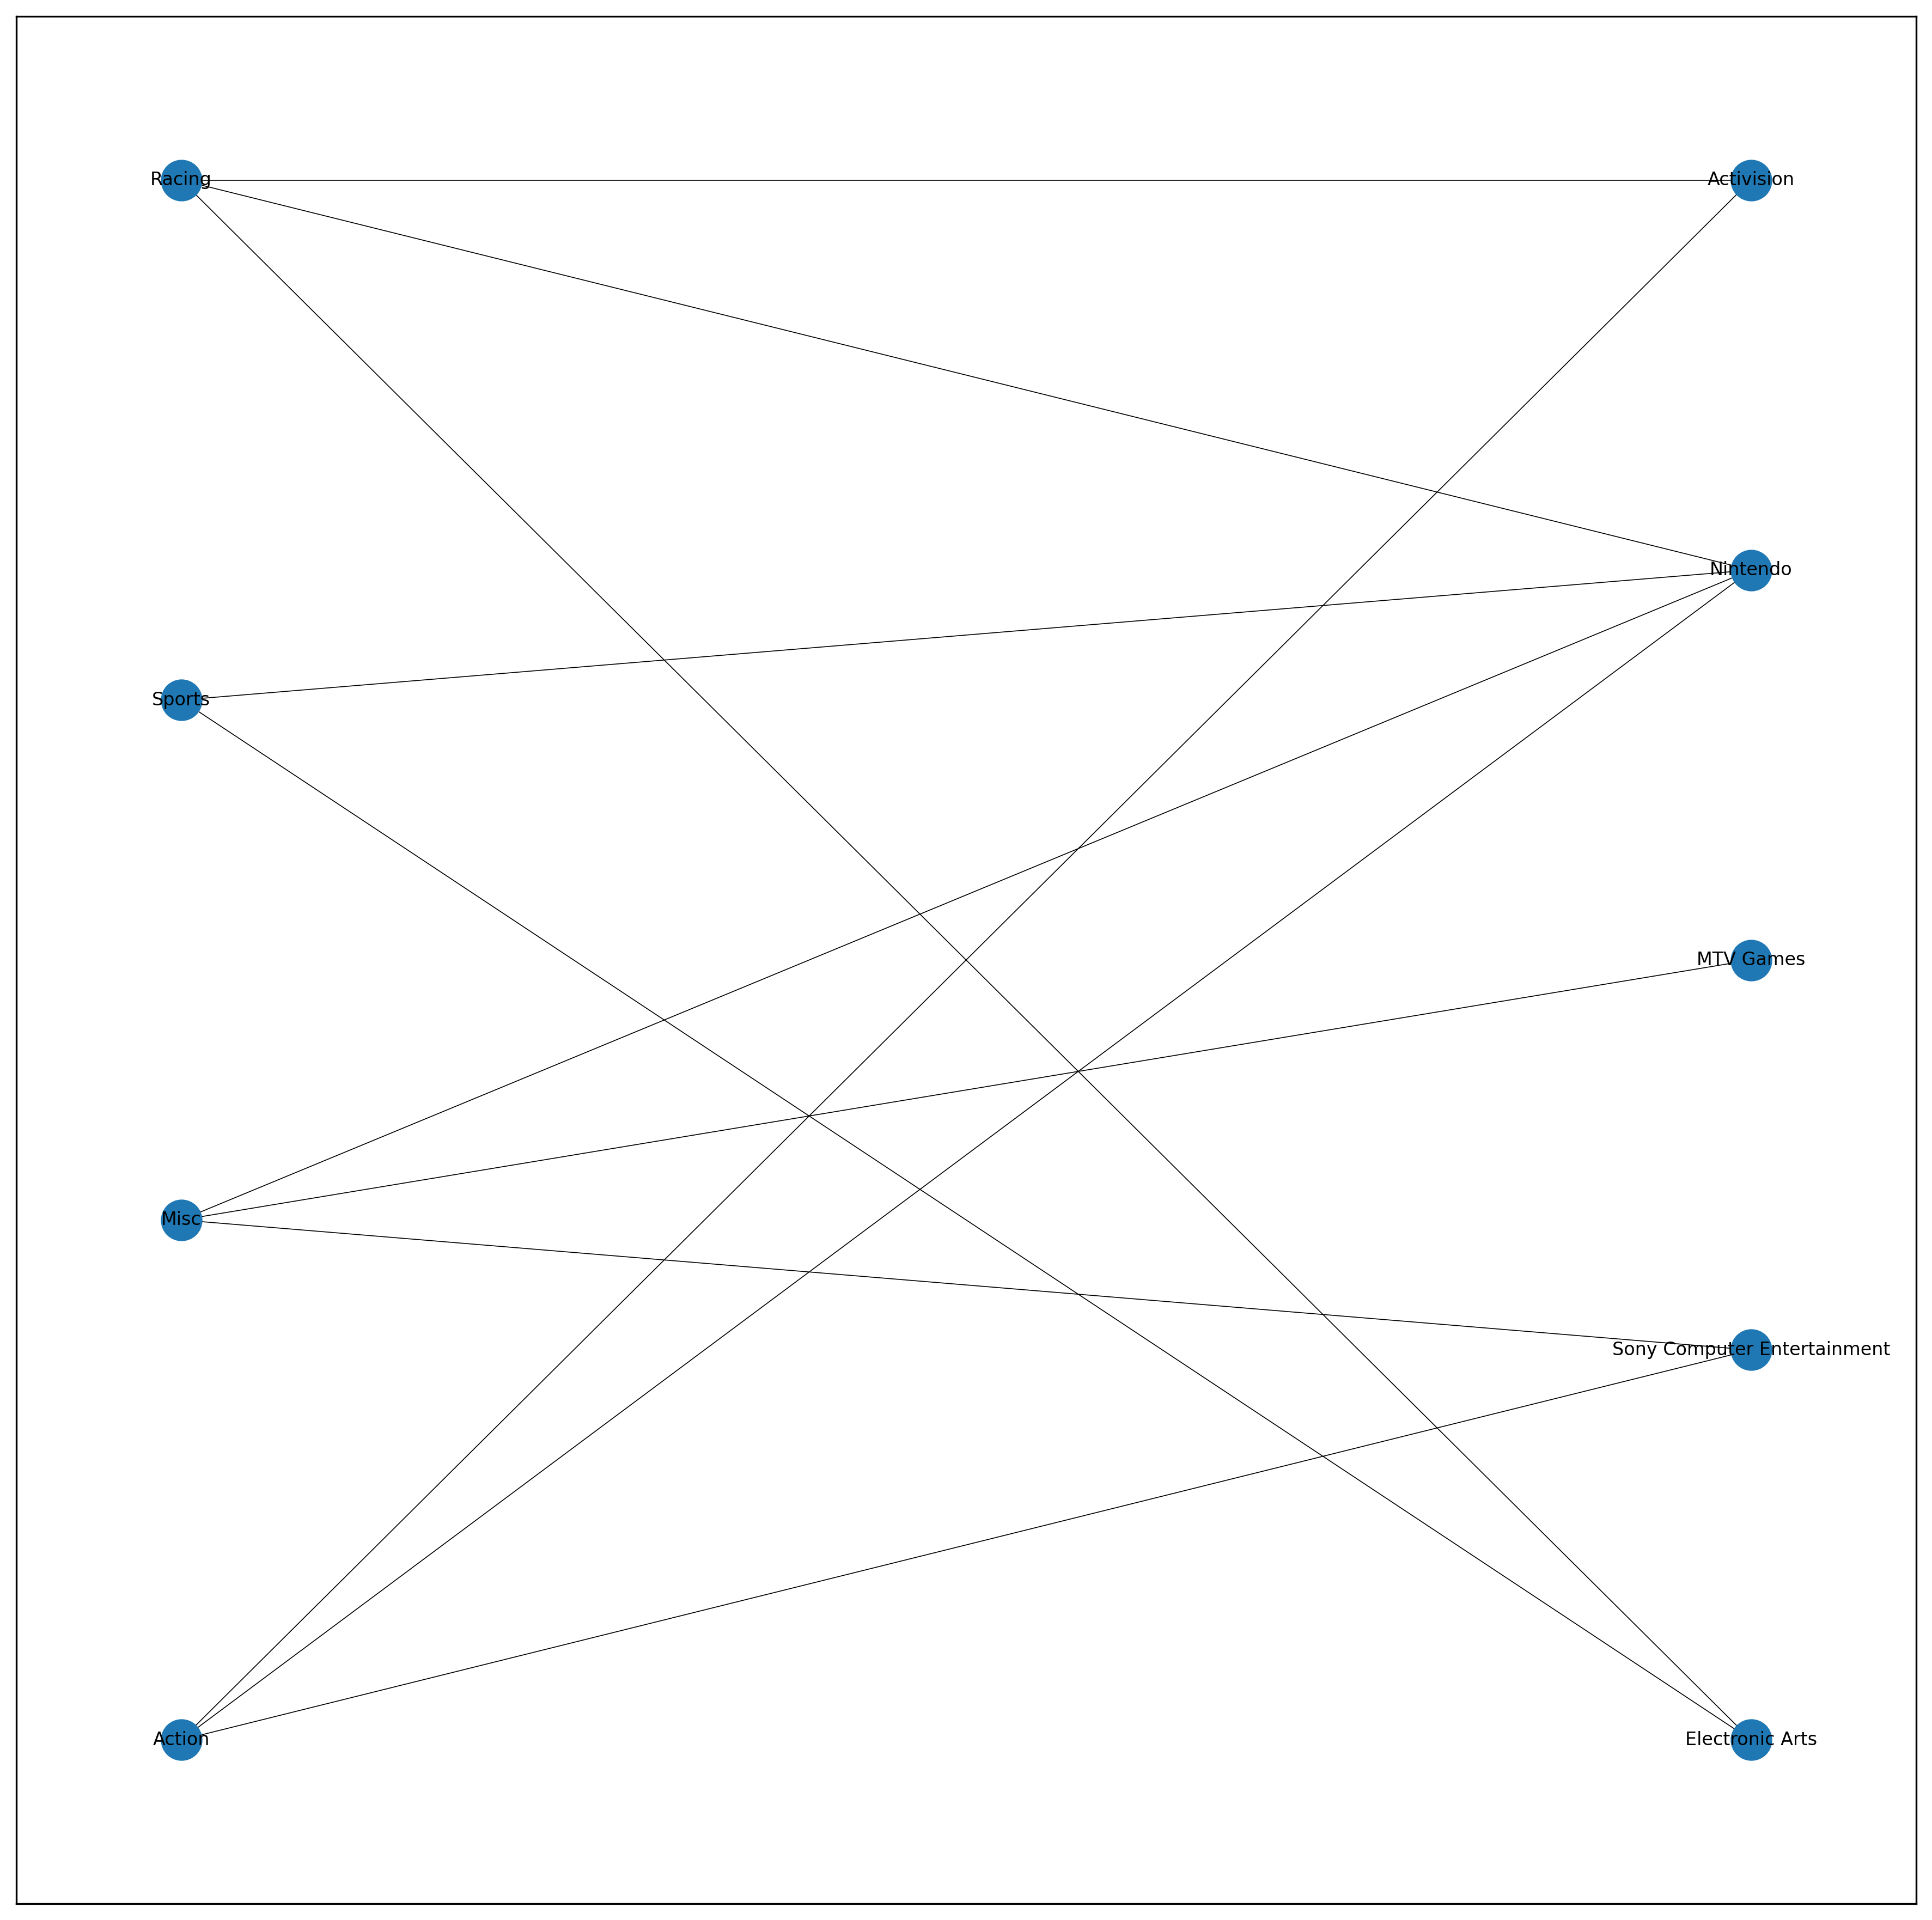

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
pos = nx.spring_layout(g_1)
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi = 300)
nx.draw_networkx(g_1, pos = nx.drawing.layout.bipartite_layout(g_1, genres), font_size = 8, width = 0.4)

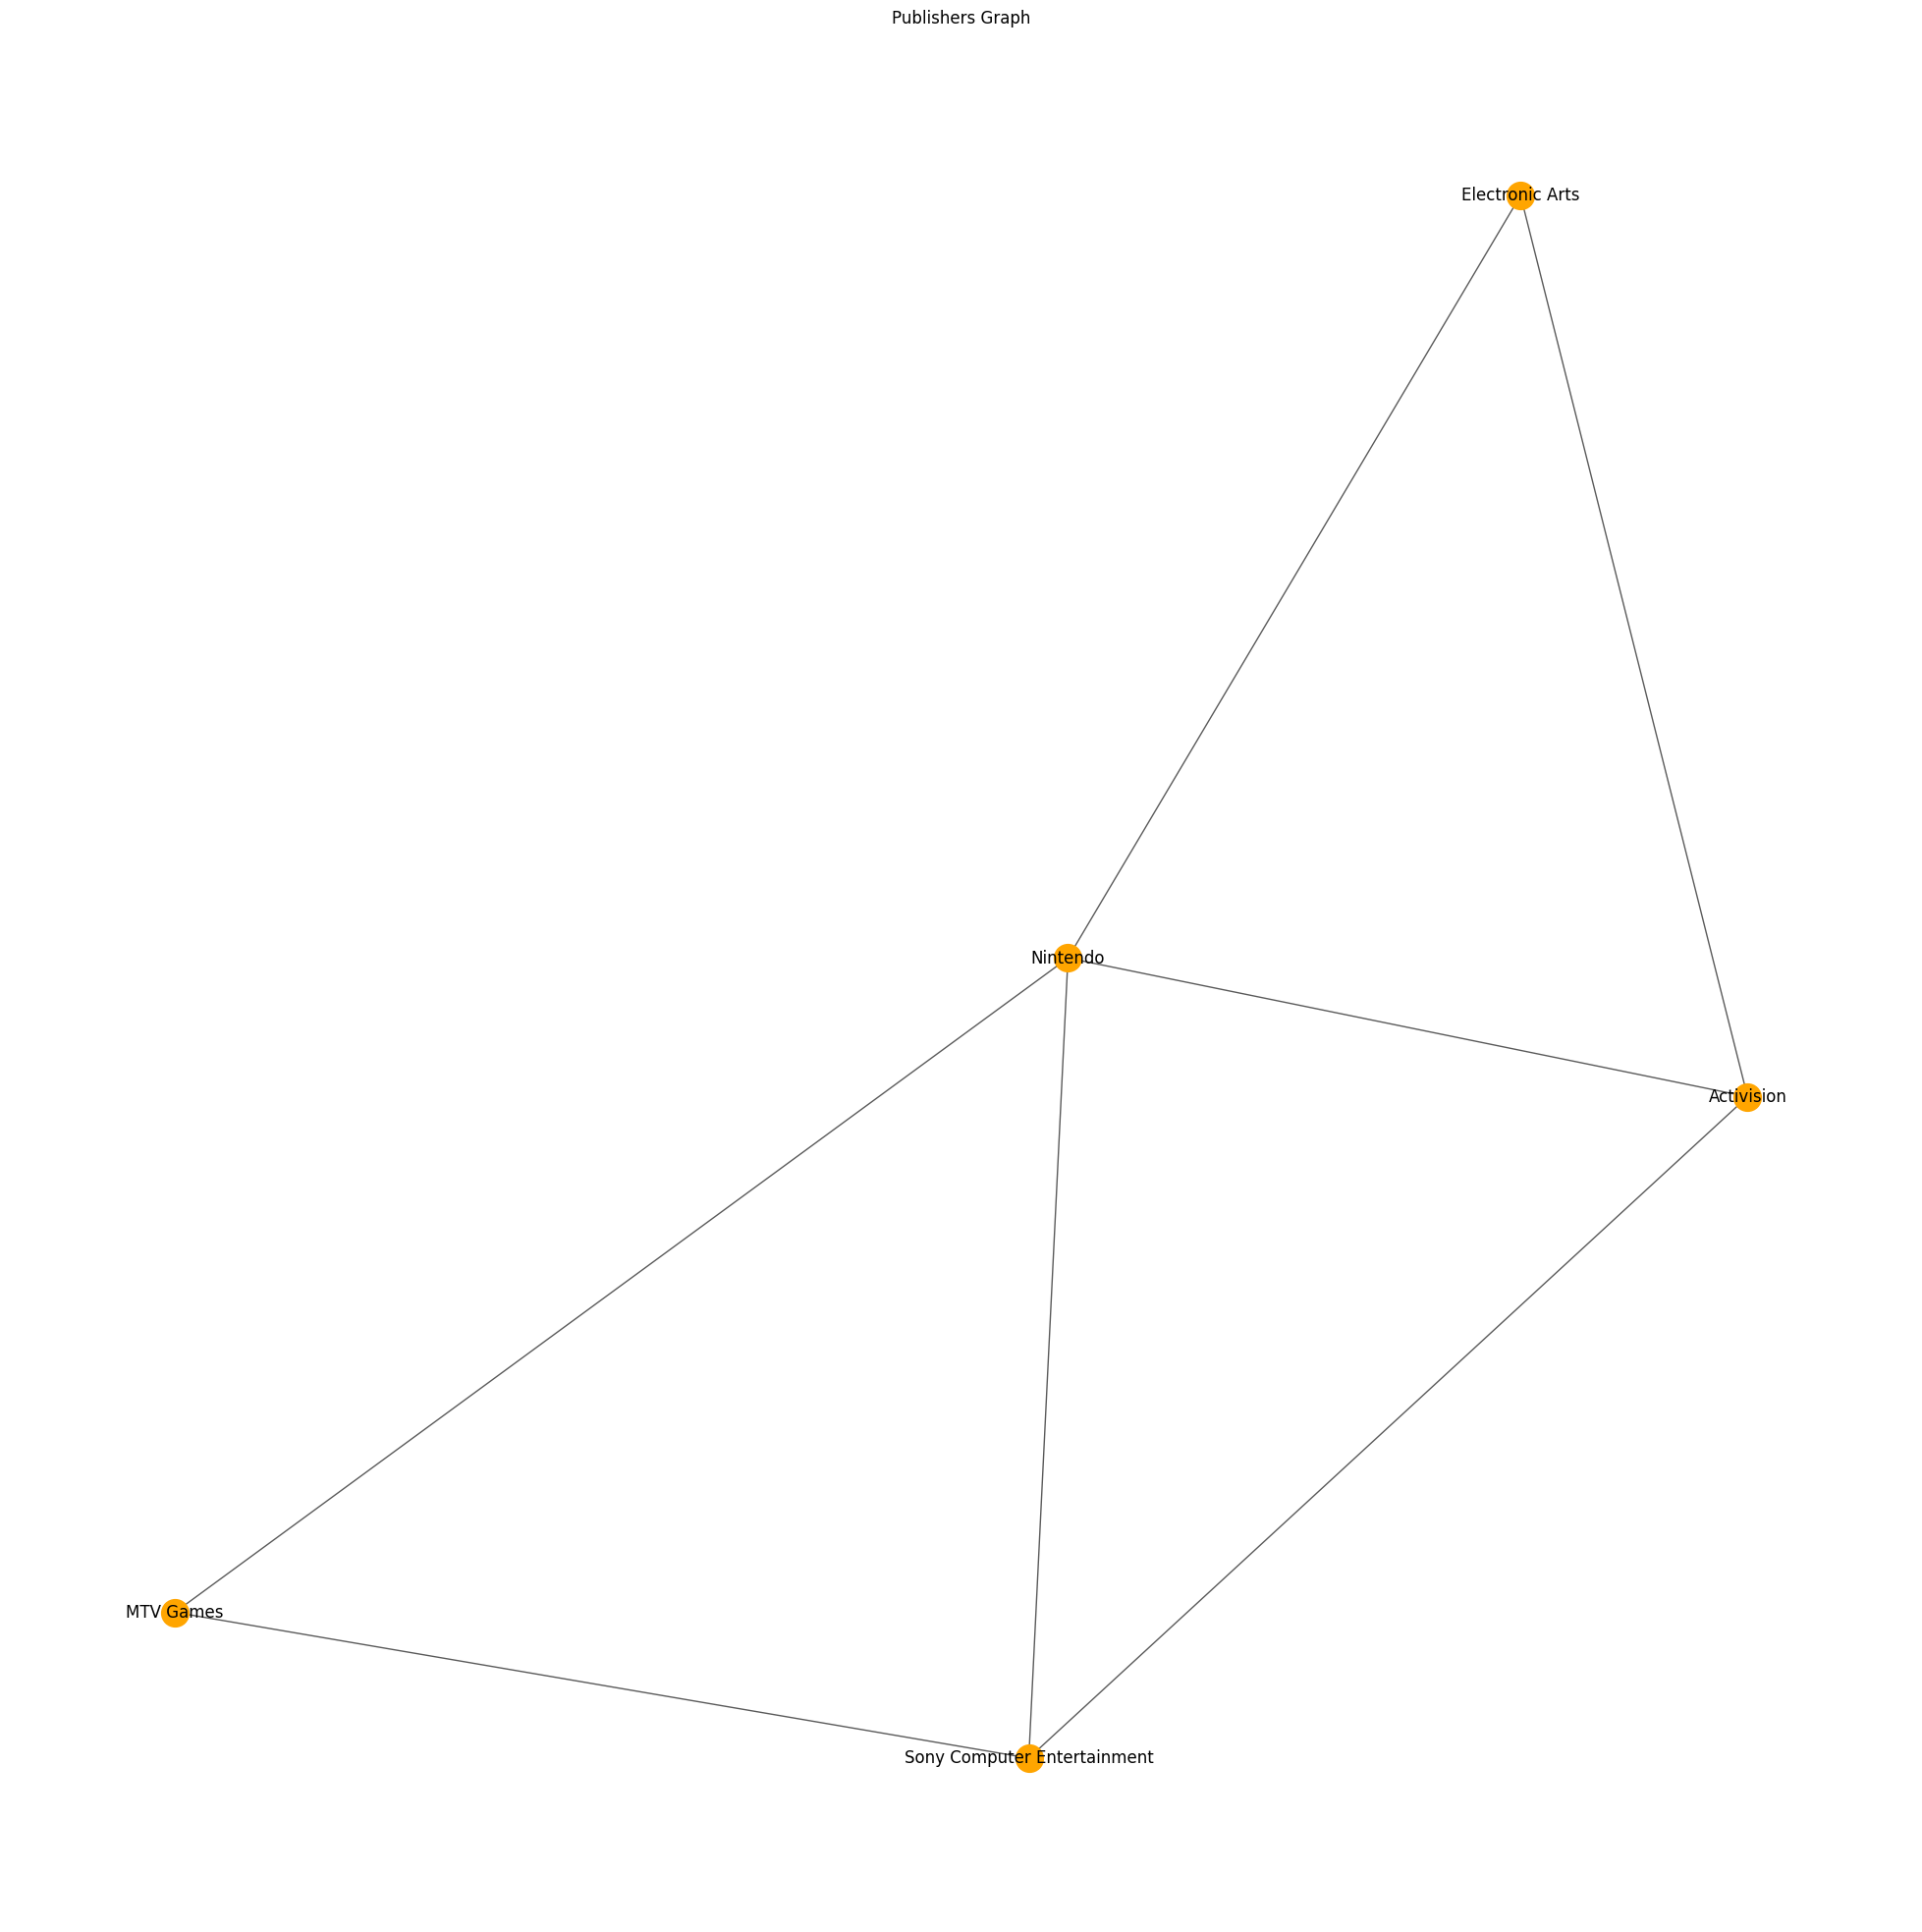

In [14]:
# Remove duplicated publishers from rows of the publishers dataframe 
# (because we need unique publishers to put into the graph):
final_publishers = publishers.drop_duplicates()
g_2 = bipartite.weighted_projected_graph(g_1, final_publishers)
plt.figure(figsize = (25, 25))

layout = nx.spring_layout(g_2)

nx.draw_networkx_nodes(
    g_2,
    layout,
    nodelist = final_publishers,
    node_size = 400,
    node_color = 'orange'
)
nx.draw_networkx_edges(g_2, layout, edge_color = '#5A5A5A')
node_labels = dict(zip(final_publishers, final_publishers))
nx.draw_networkx_labels(g_2, layout, labels = node_labels)
plt.axis('off')
plt.title('Publishers Graph')

plt.show()


Export the non bipartite graph data to a .csv file (to use in paperwork)

In [15]:
# labels = nx.get_edge_attributes(g_2, 'weight')
# df2 = pd.DataFrame(columns = ['source', 'target', 'weight'])
# for key, value in labels.items():
#     df2 = df2.append({'source': key[0], 'target': key[1], 'weight': value}, ignore_index = True)
# # Export to .csv file to be used in paperwork
# df2.to_csv('for_simpler_graph.csv', index = False, header = True)
# # If this file is compiled with Google Colab please add '/' before the file name to get the 
# # exported csv in the root directory as below:
# # df2.to_csv('for_simpler_graph.csv', index = False, header = True)

Communities detection with Louvain algorithm

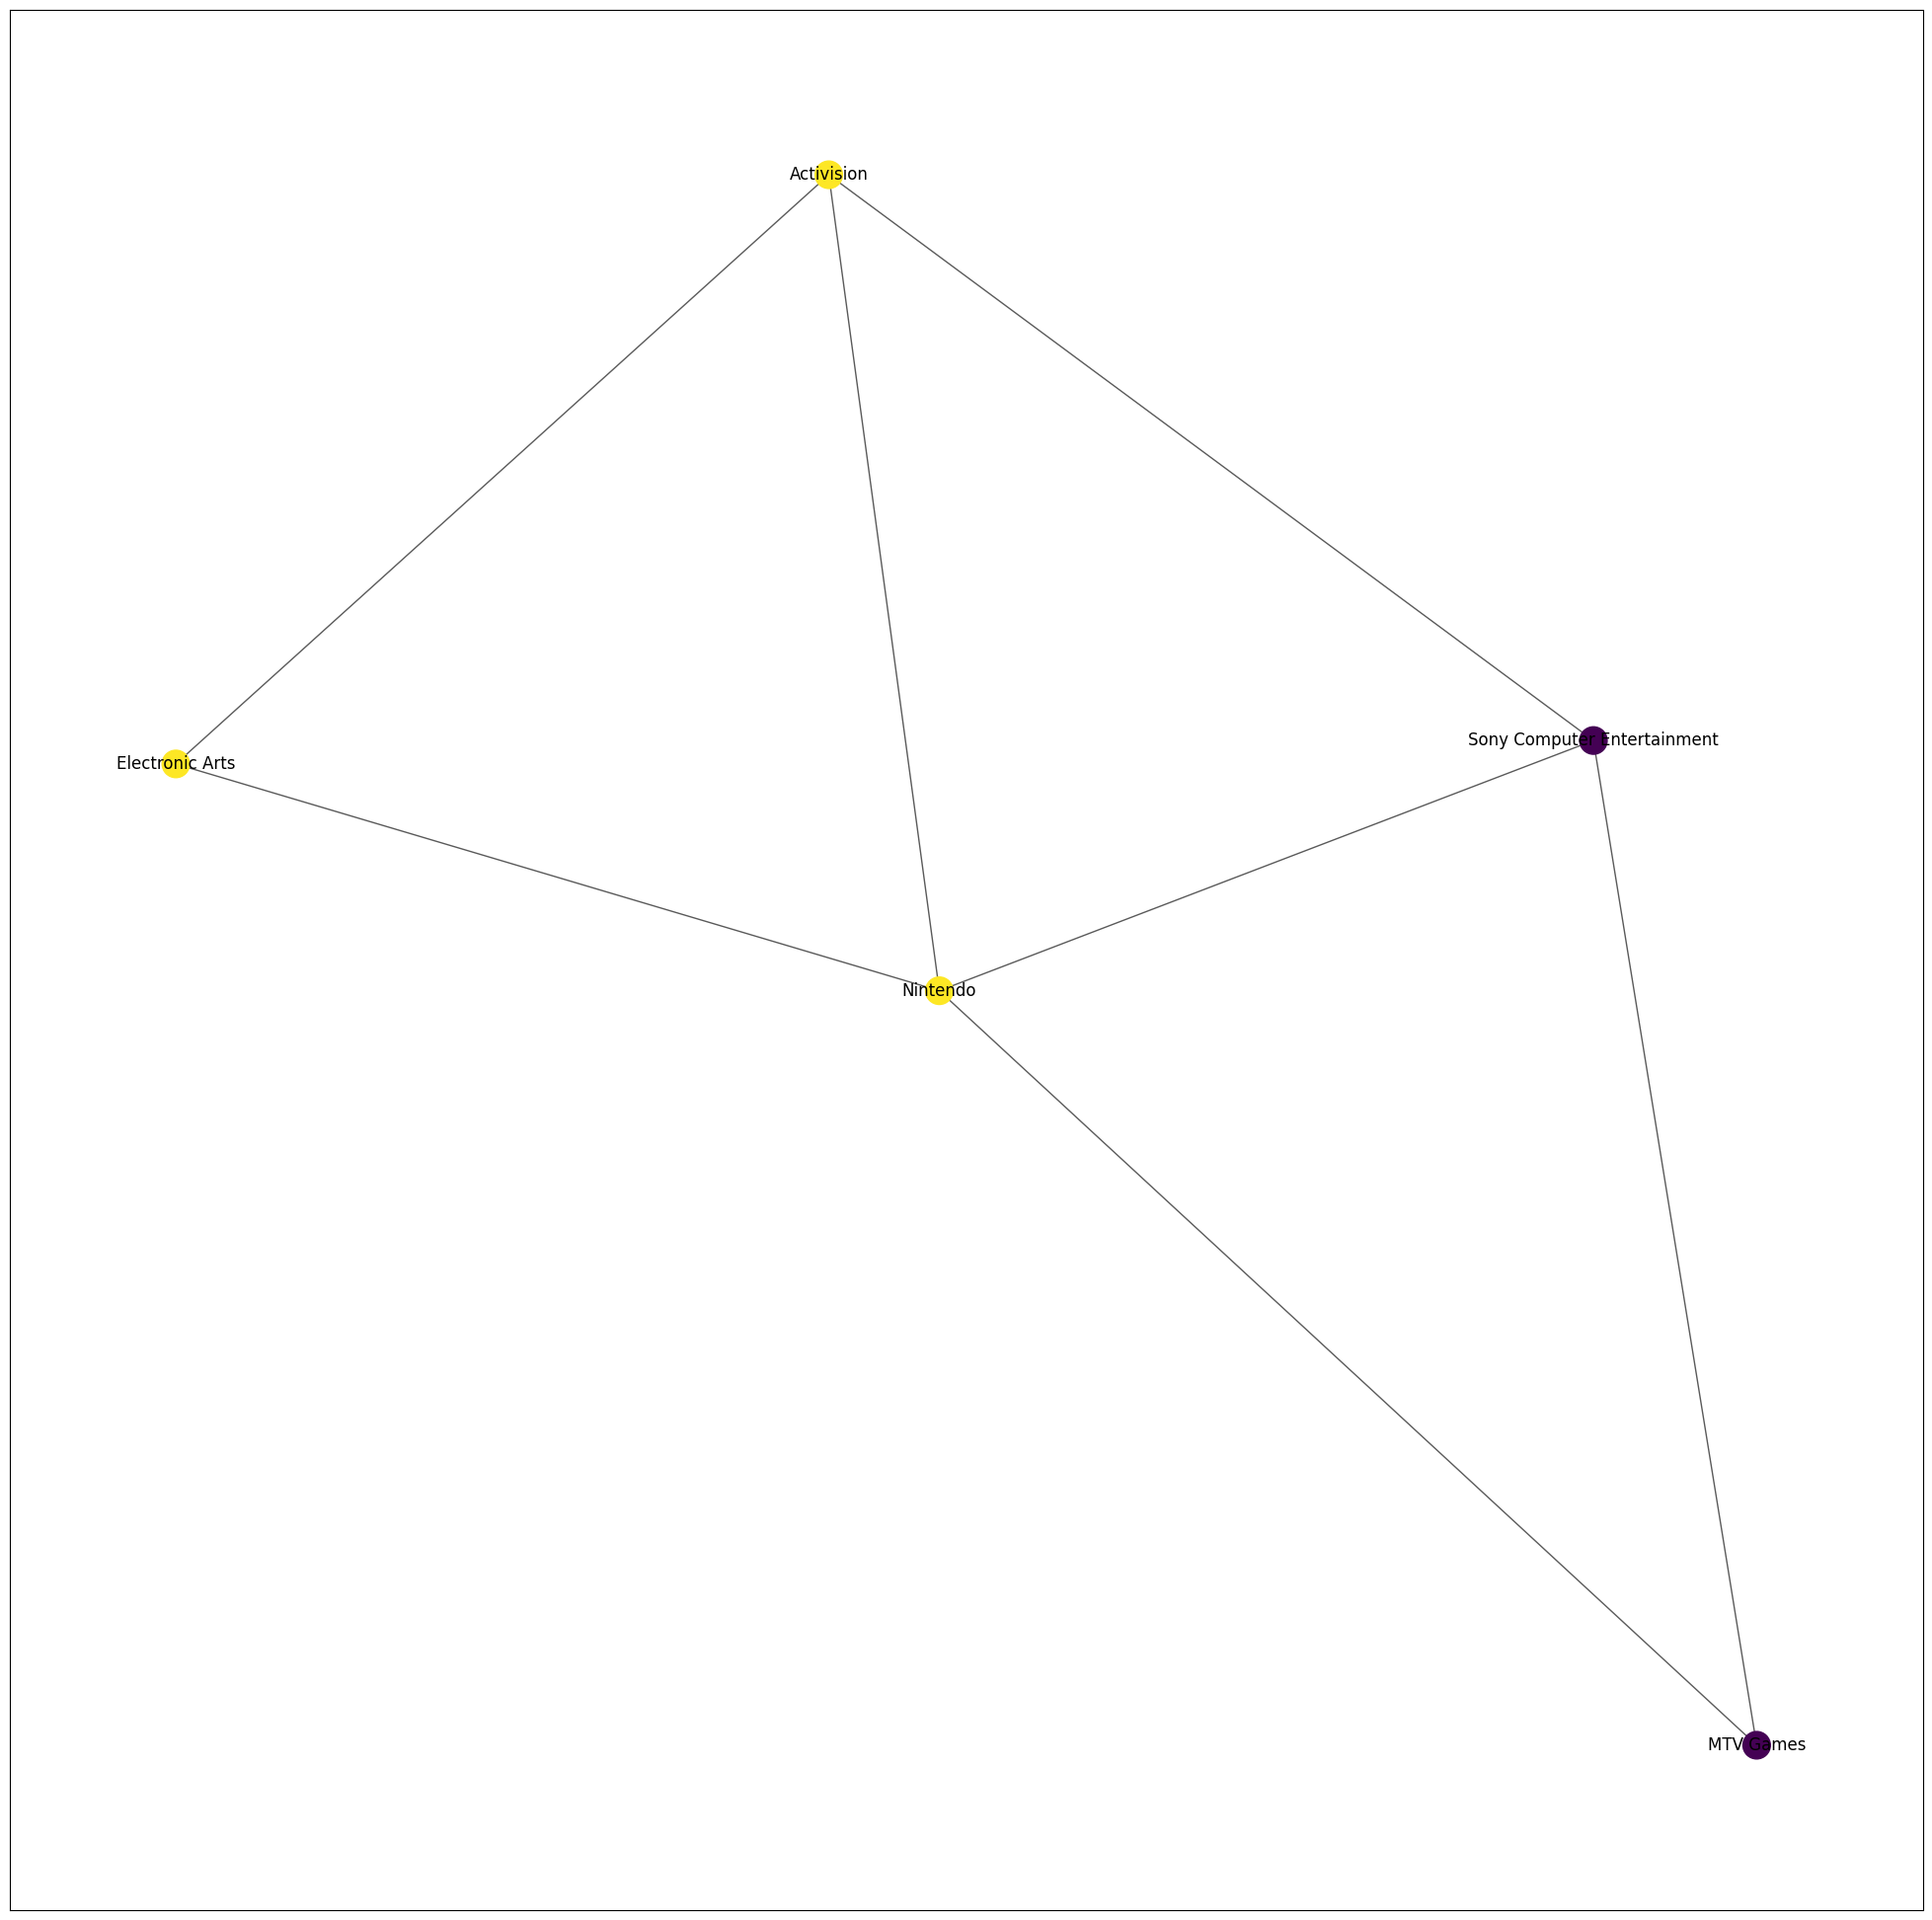

In [52]:
import matplotlib.cm as cm
import matplotlib
from community import community_louvain

plt.figure(figsize = (25, 25))

# Compute the best partition
partition = community_louvain.best_partition(g_2)

# Draw the graph
pos = nx.spring_layout(g_2)
# Color the nodes according to their partitions
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(g_2, pos, partition.keys(), node_size = 400, cmap = cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g_2, pos, edge_color = '#5A5A5A')
nx.draw_networkx_labels(g_2, pos)

plt.show()

Calculate number of communities and show the members of each community

In [53]:
import numpy as np
values = list(partition.values())

# Print number of communities
print('Number of communities: ', len(np.unique(values)))

Number of communities:  2


In [54]:
for i in range(len(np.unique(values))):
    print("---------", "Community ", i + 1, "---------")
    print("")
    for name, k in partition.items():
        if k == i:
            print(name)
    print("")

--------- Community  1 ---------

Sony Computer Entertainment
MTV Games

--------- Community  2 ---------

Nintendo
Electronic Arts
Activision



Analyse genres of each community to get to know its meaning

Analyse genres of each community

--------- Community  1 ---------

Sports: 0
Racing: 0
Misc: 2
Action: 1



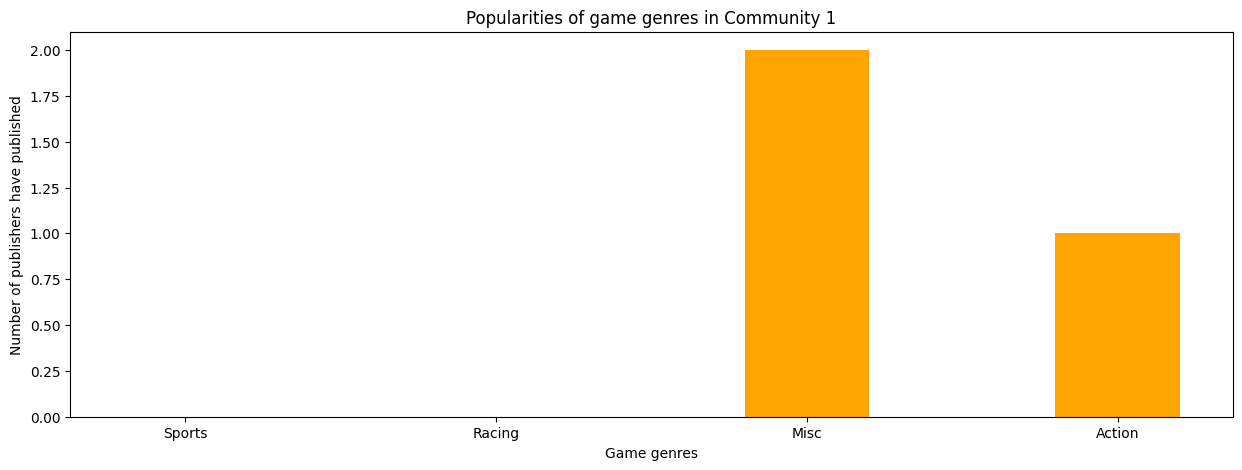


--------- Community  2 ---------

Sports: 2
Racing: 3
Misc: 1
Action: 2



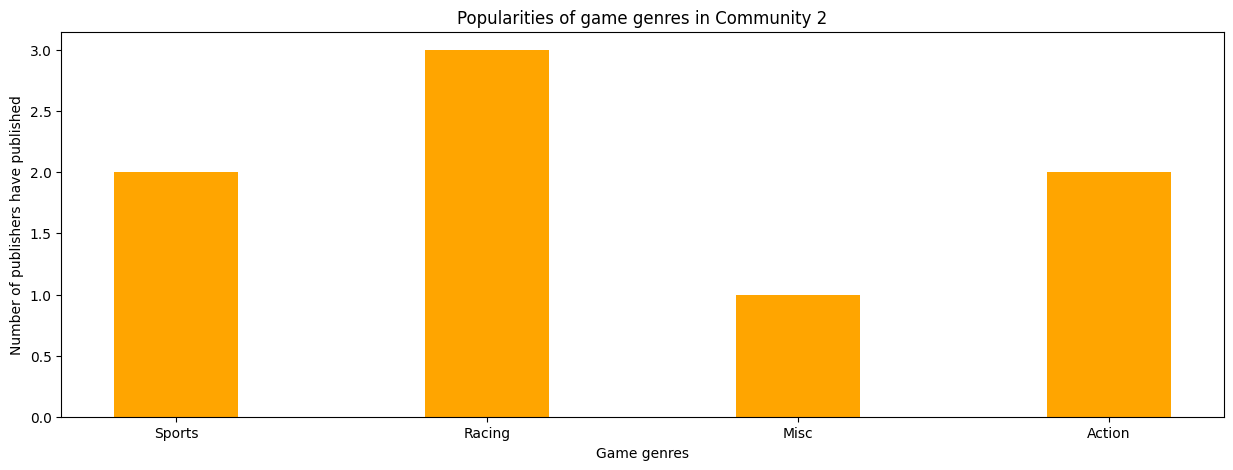

In [55]:
# Remove duplicated genres from rows of the genres dataframe 
# (because we need unique genres):
final_genres = genres.drop_duplicates()
comNodes = []
print("Analyse genres of each community")
print("")

for c in range(len(np.unique(values))):
    comNodes.clear()
    genresValues = []
    print("---------", "Community ", c + 1, "---------")
    print("")
    for name, k in partition.items():
        if k == c:
            comNodes.append(name)
    for genre in final_genres:
        hasGenreCount = 0
        for i in comNodes:
            # Search in the dataframe if this publisher in this community
            # has a connection to this genre or not
            if ((df_new['Genre'] == genre) & (df_new['Publisher'] == i)).any():
                hasGenreCount = hasGenreCount + 1
        genresValues.append(hasGenreCount)
        print(genre + ": " + str(hasGenreCount))

    # Draw bar chart    
    print("")
    fig = plt.figure(figsize = (15, 5))
    # Creating the bar plot
    plt.bar(final_genres, genresValues, color ='orange', width = 0.4)
    plt.xlabel("Game genres")
    plt.ylabel("Number of publishers have published")
    plt.title("Popularities of game genres in Community " + str(c + 1))
    plt.show()
    print("")

Node ranking algorithms

1. PageRank

In [56]:
pr = nx.pagerank(g_2)
for k, v in sorted(pr.items(), key=lambda item: item[1], reverse=True):
    print(k, ": ", v)

Nintendo :  0.33452934459428385
Sony Computer Entertainment :  0.20140338818644235
Activision :  0.19744768609560442
Electronic Arts :  0.1532000095883099
MTV Games :  0.11341957153535934


2. Eigenvector Centrality

In [57]:
eigen_centrality = nx.eigenvector_centrality(g_2)
for k, v in sorted(eigen_centrality.items(), key=lambda item: item[1], reverse=True):
    print(k, ": ", v)

Nintendo :  0.5590326188442775
Sony Computer Entertainment :  0.46995923844336235
Activision :  0.46995923844336235
Electronic Arts :  0.35054183735438676
MTV Games :  0.3505418373543867


Betweeness and closeness centrality (descending order)

1. Betweeness centrality

a. For nodes

In [58]:
bet_centrality_nodes = nx.betweenness_centrality(g_2)
for k, v in sorted(bet_centrality_nodes.items(), key=lambda item: item[1], reverse=True):
    print(k, ": ", v)

Nintendo :  0.3333333333333333
Sony Computer Entertainment :  0.08333333333333333
Activision :  0.08333333333333333
Electronic Arts :  0.0
MTV Games :  0.0


b. For edges

In [59]:
bet_centrality_edges = nx.edge_betweenness_centrality(g_2)
for k, v in sorted(bet_centrality_edges.items(), key=lambda item: item[1], reverse=True):
    print(k, ": ", v)

('Nintendo', 'Electronic Arts') :  0.25
('Nintendo', 'MTV Games') :  0.25
('Sony Computer Entertainment', 'Activision') :  0.2
('Nintendo', 'Sony Computer Entertainment') :  0.15000000000000002
('Nintendo', 'Activision') :  0.15000000000000002
('Electronic Arts', 'Activision') :  0.15000000000000002
('Sony Computer Entertainment', 'MTV Games') :  0.15000000000000002


2. Closeness centrality

In [60]:
clo_centrality = nx.closeness_centrality(g_2)
for k, v in sorted(clo_centrality.items(), key=lambda item: item[1], reverse=True):
    print(k, ": ", v)

Nintendo :  1.0
Sony Computer Entertainment :  0.8
Activision :  0.8
Electronic Arts :  0.6666666666666666
MTV Games :  0.6666666666666666
